# Toffoli gate

## CCX gate

The CCX gate (controlled controlled X Gate) is also called a Toffoli gate. The CCX gate is a three-bit gate, with two controls and one target as their input and output. If the first two bits are in the state $|1\rangle$, it applies a Pauli-X (or NOT) on the third bit. Otherwise, it does nothing. 


$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}$



 check out for more info [`single qubit gates` ](https://qiskit.org/textbook/ch-states/single-qubit-gates.html)

In [1]:
# Getting rid of unnecessary warnings
import warnings
from matplotlib.cbook import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Useful to have pi
import math
pi=math.pi

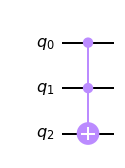

In [2]:
ccx_gate = QuantumCircuit(3)
ccx_gate.ccx(0,1,2)
ccx_gate.draw(output='mpl')

## Using the Circuit Composer widget

In [10]:
from ibm_quantum_widgets import CircuitComposer
editor = CircuitComposer()
editor

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001E77382DFC8>)

## Composite quantum gates and their cost

A real quantum computer normally does not have physical implementations of all gates. Instead they use a small set of base gates, which form a universal gate set, this is, similar to the classical case, a set of instructions which can be used to implement all possible operations.

For this reason, quantum circuits must be transpiled into basis gates before execution. This is usually done automatically by Qiskit transpiler when a quantum circuit is sent to a IBM Quantum system. The basis gates for IBM Quantum system is typically CX, ID, RZ, SX and X gates.

Consider an example

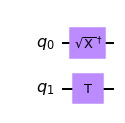

In [5]:
qc = QuantumCircuit(2)
qc.sxdg(0)
qc.t(1)
qc.draw(output='mpl')

Now lets show how a decomposition of the above circuit for a quantum computer, using only the base gates, could look.

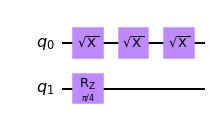

In [6]:
qc = QuantumCircuit(2)
qc.sx(0)
qc.sx(0)
qc.sx(0)
qc.rz(pi/4,1)
qc.draw(output='mpl')

As you can see, we now use only the base gates, but for this reason more total gates are used. The more gates a circuit has, the more complex it is to run. So, when we want to calculate the cost of a circuit, we consider the number of gates used. However, not all gates are considered equal expensive, so when we calculate the cost of a circuit, we use the following formula:

$$
Cost = 10 N_{CNOT} + N_{other}
$$

where $N_{CNOT}$ is the number of CNOT gate and $N_{other}$ is the number of other gates.


### Hadamard gate

AA Hadamard gate represents a rotation of $\pi$ about the axis that is in the middle of the X-axis and Z-axis.
It maps the basis state $|0\rangle$ to $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, which means that a measurement will have equal probabilities of being `1` or `0`, creating a 'superposition' of states. This state is also written as $|+\rangle$. What the Hadamard does is to transform between the $|0\rangle$ $|1\rangle$ and the $|+\rangle$ $|-\rangle$ base. 

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

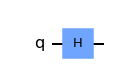

In [2]:
#  H-gate on a |0> qubit
h_gate = QuantumCircuit(1)
h_gate.h(0)
h_gate.draw(output='mpl')

As said all operations can be expressed just using the base gates. We don't have a base gate which does a direct rotation around the axis that is in the middle of the X-axis and Z-axis, so we instead use rotations around the X-axis and Z-axis to get the same result. 


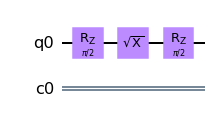

In [3]:
q=QuantumRegister(1)
c=ClassicalRegister(1)
qc=QuantumCircuit(q,c)
qc.rz(pi/2, 0)
qc.sx(0)
qc.rz(pi/2, 0)
qc.draw(output='mpl')

The Toffoli gate is a universal gate for classical computation the same way the NAND gate is, but it is reversible. Further  it builds a simple universal gate set for quantum computation if combined with the Hadamard gate. 

Now to construct a Toffoli gate only using our basis gates.The biggest challenge is to construct the needed controlled rotations.

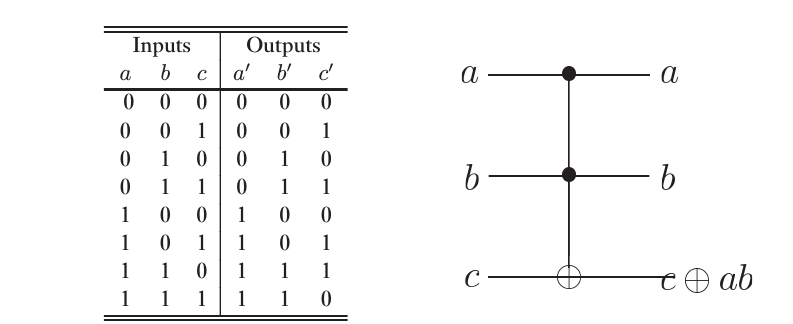

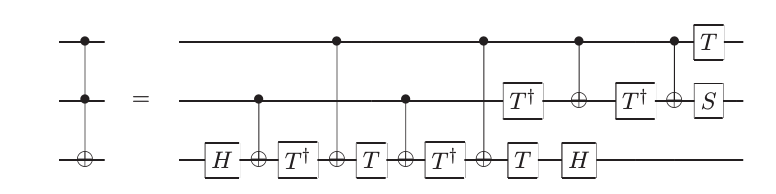

In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from ibm_quantum_widgets import CircuitComposer
editorEx = CircuitComposer() 
editorEx
##### Build your quantum circuit here using the composer widget.

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001E77373A188>)

In [5]:
# You can also build your circuit programmatically using Qiskit code

circuit = QuantumCircuit(3)

circuit.rz(pi/2,2)
circuit.sx(2)
circuit.rz(pi/2,2)
circuit.cx(1,2)
circuit.rz(-pi/4,2)
circuit.cx(0,2)
circuit.rz(pi/4,2)
circuit.cx(1,2)
circuit.rz(-pi/4,2)
circuit.cx(0,2)
circuit.rz(-pi/4,1)
circuit.rz(pi/4,2)
circuit.cx(0,1)
circuit.rz(-pi/4,1)
circuit.cx(0,1)
circuit.rz(pi/2,1)
circuit.rz(pi/4,0)
circuit.rz(pi/2,2)
circuit.sx(2)
circuit.rz(pi/2,2)


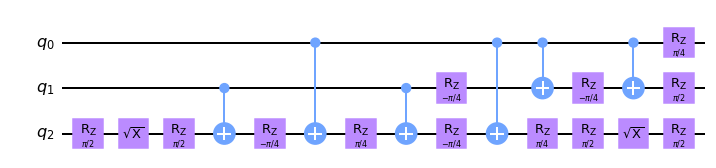

In [6]:
qc = editorEx.circuit 
qc = circuit 

qc.draw(output='mpl')

Now decompose the circuit 

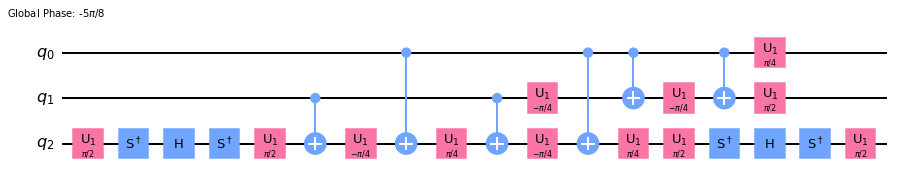

In [9]:
qc = qc.decompose()
qc.draw('mpl')